In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from import_file import *
load_libs()

# US ASOS Dataset

## Combining Files

In [2]:
# file_dir, save_file_dir = 'DEN', './data/asos/denver_CO'
# file_dir, save_file_dir = 'GJT', './data/asos/grand_junction_CO'
# file_dir, save_file_dir = 'PUB', './data/asos/pueblo_CO'
# file_dir, save_file_dir = 'COS', './data/asos/colorado_springs_CO'

# file_dir, save_file_dir = 'BIS', 'D:/data/asos/bismarck_ND' # slight different shape on hour avg
# file_dir, save_file_dir = 'FAR', './data/asos/fargo_ND' # 
# file_dir, save_file_dir = 'GFK', './data/asos/grand_forks_ND' 
# file_dir, save_file_dir = 'ISN', 'D:/data/asos/williston_ND'

# file_dir, save_file_dir = 'OLM', 'D:/data/asos/olympia_WA', # strong directionality; change of speed shapre, high 0 when avg
# file_dir, save_file_dir = 'SEA', './data/asos/seattle_WA' # strong directionality
# file_dir, save_file_dir = 'UIL', 'D:/data/asos/quillayute_WA' 

# file_dir, save_file_dir = 'SPI', 'D:/data/asos/springfield_IL'
# file_dir, save_file_dir = 'ORD', 'D:/data/asos/chicago_ohare_IL' 

# file_dir, save_file_dir = 'ABR', './data/asos/aberdeen_SD' # only to 2012
# file_dir, save_file_dir = 'MSP', './data/asos/minneapolis_MN'
# file_dir, save_file_dir = 'LNK', './data/asos/lincoln_NE' # slight transformation on hourly avg
# file_dir, save_file_dir = 'DSM', './data/asos/des_moines_IA'
# file_dir, save_file_dir = 'TOP' , 'D:/data/asos/topeka_KS' # high 0 when averaging

file_dir, save_file_dir = 'BWI' , 'D:/data/asos/baltimore_MD' # slight high 0 after averaging

# file_dir, save_file_dir = 'ABE' , 'D:/data/asos/allentown_PA' 

In [3]:
convert_type = 'hr_avg'
# convert_type = '10min_avg'

In [4]:
from io import StringIO

fout = StringIO()
for year in range(2000,2017):
    for month in range(1,13):
        try: 
            for line in open('D:/1min采样间隔的数据/'+ str(year) + '/'+ file_dir +str(year)+"%02d"%(month)+".dat"):
                fout.write(line.replace("[", " ").replace("]", " ").replace('"', " ").replace('`', " "))
        except: 
            pass
all_data_file = fout.getvalue()
fout.close()

## Read from US 1 min

In [5]:
if file_dir in ["MSP", 'DEN', 'SEA', 'ORD']: 
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ',
                    names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown'])
elif  file_dir in ['BWI']:
    df= pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ',
                names = ['stationID','time','vis','day_type','vis2','day_type2','dir','speed','dir_max','speed_max','visual_range', 'unknown2',  'unknown'])
else:
    df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, sep=' ', error_bad_lines=False,
                    names = ['stationID','time','vis','day_type','dir','speed','dir_max','speed_max','unname','visual_range', 'unknown'])

df

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,6,7,8,9,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stationID,time,vis,day_type,vis2,day_type2,dir,speed,dir_max,speed_max,visual_range,unknown2,unknown
0,93721KBWI,BWI2000010100000500,0.653,N,0.836,N,196,0,194,1,10,60+,NaN
1,93721KBWI,BWI2000010100010501,0.653,N,0.864,N,194,0,194,1,10,60+,NaN
2,93721KBWI,BWI2000010100020502,0.717,N,0.844,N,192,0,179,0,10,60+,NaN
3,93721KBWI,BWI2000010100030503,0.705,N,0.898,N,178,0,163,1,10,60+,NaN
4,93721KBWI,BWI2000010100040504,0.649,N,0.847,N,165,1,165,1,10,60+,NaN
5,93721KBWI,BWI2000010100050505,0.619,N,0.834,N,161,0,141,0,10,60+,NaN
6,93721KBWI,BWI2000010100060506,0.616,N,0.819,N,146,0,120,0,10,60+,NaN
7,93721KBWI,BWI2000010100070507,0.637,N,0.834,N,128,0,120,0,10,60+,NaN
8,93721KBWI,BWI2000010100080508,0.657,N,0.830,N,120,0,120,0,10,60+,NaN
9,93721KBWI,BWI2000010100090509,0.632,N,0.812,N,120,0,121,1,10,60+,NaN


In [6]:
# Drop duplicate
df.drop_duplicates(subset='time', inplace=True)

# Drop too many field
df = df[df['unknown'].isnull()].copy()
df.drop('unknown', axis=1, inplace=True)

# Drop missing field
# Cannot use visual range, since some previous data lack of
df.dropna(subset=['vis', 'dir','speed','dir_max','speed_max'], inplace=True)

In [7]:
if file_dir in ["TOP"]:
    df = df[df['unname'].isnull()]
    df.drop('unname', axis=1, inplace=True)

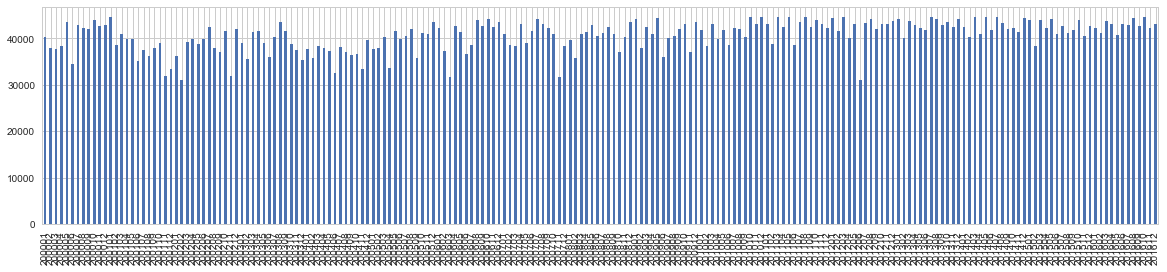

In [8]:
df['year_month'] = df['time'].apply(lambda x: x[3:9])
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

0        200
1      12515
2      12594
3      12414
4      12815
5      12965
6      12923
7      13061
8      13249
9      13375
10     13580
11     13543
12     13476
13     13457
14     13455
15     13541
16     13346
17     13186
18     12953
19     12595
20     12904
21     12697
22     12646
23     12543
24     12531
25     12675
26     12996
27     13171
28     13346
29     13661
       ...  
331    19220
332    18383
333    18368
334    17814
335    17119
336    16988
337    16793
338    16466
339    16048
340    15643
341    15503
342    15080
343    14737
344    14625
345    14611
346    13823
347    13543
348    13073
349    12800
350    12491
351    12676
352    12184
353    11884
354    12233
355    11734
356    12022
357    11797
358    11919
359    12059
360    12113
Name: dir, Length: 361, dtype: int64

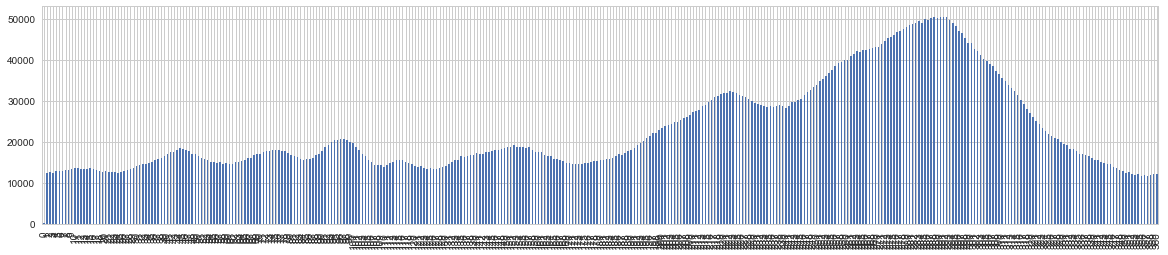

In [9]:
# Drop non-integer data for direction
df.dir = pd.to_numeric(df.dir, errors='coerce')  # Drop not a number
df = df[df.dir == df.dir // 1] # Drop not an integer
df = df[df['dir'].isin(arange(0,361))] # Drop not in range
df['dir'] = df['dir'].apply(lambda x: int(x)) # Convert back to integer
# Need to consider 0

display(df.dir.value_counts().sort_index())
df.dir.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

0       283429
1       653890
2       901918
3       943176
4       897489
5       824065
6       747541
7       652226
8       539875
9       430011
10      334656
11      259708
12      199781
13      153569
14      117778
15       89976
16       68505
17       51355
18       38001
19       28238
20       20344
21       14686
22       10371
23        7055
24        4869
25        3239
26        2050
27        1339
28         943
29         588
         ...  
2127         1
2135         1
2148         1
2150         1
2151         1
2213         1
2218         1
2220         1
2229         1
2233         1
2235         1
2237         1
2242         1
2252         1
2254         1
2256         1
2259         1
2301         1
2302         1
2305         1
2306         1
2311         1
2316         1
2319         1
2325         1
2328         1
2338         1
2344         1
2351         1
2358         2
Name: speed, Length: 533, dtype: int64

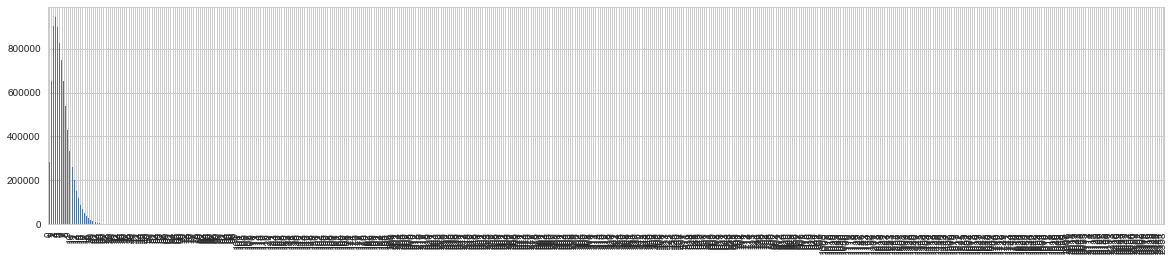

In [10]:
# Drop non-integer data for speed
df.speed = pd.to_numeric(df.speed, errors='coerce')
df = df[df.speed == df.speed // 1]
df['speed'] = df['speed'].apply(lambda x: int(x))

display(df.speed.value_counts().sort_index())
df.speed.value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [11]:
df.query('(speed > 100) | (speed <0 )')

,stationID,time,vis,day_type,vis2,day_type2,dir,speed,dir_max,speed_max,visual_range,unknown2,year_month
122853,93721KBWI,BWI2000040614131913,0.084,D,0.120,D,16,205,19,10,60+,NaN,200004
562470,93721KBWI,BWI2001022021000200,0.087,N,0.122,N,22,203,0.083,N,0.120,N,200102
562611,93721KBWI,BWI2001022100080508,N,0.160,N,260,6,259,7,10,60+,NaN,200102
562644,93721KBWI,BWI2001022100510551,0.096,N,0.130,N,28,552,0.096,N,0.129,N,200102
571383,93721KBWI,BWI2001022707181218,D,0.294,D,249,2,254,2,10,60+,NaN,200102
571413,93721KBWI,BWI2001022707561256,0.216,D,0.273,D,26,1257,0.216,D,0.272,D,200102
571484,93721KBWI,BWI2001022709291429,D,0.123,D,240,6,235,9,10,60+,NaN,200102
571936,93721KBWI,BWI2001022718432343,0.077,60+.102,N,139,2,144,2,10,60+,NaN,200102
572083,93721KBWI,BWI2001022721310231,N,0.103,N,315,4,353,9,10,60+,NaN,200102
572099,93721KBWI,BWI2001022721500250,0.076,N,0.107,N,33,252,0.076,N,0.105,N,200102


In [12]:
df = df.query('(speed <= 100)  & (speed >= 0)')
df = df[df['day_type'].str.contains("D|N") == True]
df['vis']=pd.to_numeric(df['vis'], errors='coerce')
df = df.dropna(subset=['vis'])

display(df.query('speed == 0'))
# Drop Dir 0?
display(df.query('dir == 0'))

,stationID,time,vis,day_type,vis2,day_type2,dir,speed,dir_max,speed_max,visual_range,unknown2,year_month
0,93721KBWI,BWI2000010100000500,0.653,N,0.836,N,196,0,194,1,10,60+,200001
1,93721KBWI,BWI2000010100010501,0.653,N,0.864,N,194,0,194,1,10,60+,200001
2,93721KBWI,BWI2000010100020502,0.717,N,0.844,N,192,0,179,0,10,60+,200001
3,93721KBWI,BWI2000010100030503,0.705,N,0.898,N,178,0,163,1,10,60+,200001
5,93721KBWI,BWI2000010100050505,0.619,N,0.834,N,161,0,141,0,10,60+,200001
6,93721KBWI,BWI2000010100060506,0.616,N,0.819,N,146,0,120,0,10,60+,200001
7,93721KBWI,BWI2000010100070507,0.637,N,0.834,N,128,0,120,0,10,60+,200001
8,93721KBWI,BWI2000010100080508,0.657,N,0.830,N,120,0,120,0,10,60+,200001
9,93721KBWI,BWI2000010100090509,0.632,N,0.812,N,120,0,121,1,10,60+,200001
38,93721KBWI,BWI2000010100380538,0.778,N,1.030,N,133,0,128,0,10,60+,200001


,stationID,time,vis,day_type,vis2,day_type2,dir,speed,dir_max,speed_max,visual_range,unknown2,year_month
663315,93721KBWI,BWI2001050714101910,0.050,D,0.087,D,0,12,70,13,10,60+,200105
723426,93721KBWI,BWI2001062515482048,0.095,D,0.140,D,0,3,194,2,10,60+,200106
1521211,93721KBWI,BWI2003033005221022,0.145,N,0.177,N,0,14,317,21,10,60+,200303
1868723,93721KBWI,BWI2003121910111511,0.073,D,0.112,D,0,9,301,12,10,60+,200312
2002194,93721KBWI,BWI2004041000500550,0.050,N,0,38,0,19,0,10,60+,NaN,200404
3592846,93721KBWI,BWI2007081602060706,0.205,N,304,0,0,0,10,60+,NaN,NaN,200708
3593078,93721KBWI,BWI2007081605581058,0.308,D,344,0,0,0,10,60+,NaN,NaN,200708
4447927,93721KBWI,BWI2009051909031403,0.179,D,10.000,260,0,20,1,10,60+,NaN,200905
6715037,93721KBWI,BWI2013111111031603,0.064,D,0.050,76,0,20,2,10,60+,NaN,201311


In [13]:
# [1, 360] -> [0, 360]
df['dir']=df['dir'].apply(lambda x: x%360 if x <= 360 else x)

In [14]:
df.sort_values(by='speed',ascending=False).head(10)

,stationID,time,vis,day_type,vis2,day_type2,dir,speed,dir_max,speed_max,visual_range,unknown2,year_month
2172960,93721KBWI,BWI2004083006531153,0.097,D,00,60+99,3,100,4,10,60+,NaN,200408
1886523,93721KBWI,BWI2004010812351735,0.050,D,0.083,D,259,100,60+0,60+,NaN,NaN,200401
2000797,93721KBWI,BWI2004040817292229,0.373,D,0.406,D,64,100,60+,0.296,D,0.32,200404
2014894,93721KBWI,BWI2004042003160816,0.094,N,0.122,N,284,100,60+,0821,0.096,N,200404
2252409,93721KBWI,BWI2004110314061906,0.050,D,0.061,D,2,100,60+,1911,0.050,D,200411
1040861,93721KBWI,BWI2002032119580058,0.094,N,0.130,N,33,100,0.096,N,0.132,N,200203
2295182,93721KBWI,BWI2004121114551955,0.050,D,0.064,D,270,100,60+,274,11,NaN,200412
2252414,93721KBWI,BWI2004110314211921,0.050,D,0.065,D,358,100,60+0,60+,NaN,NaN,200411
2033598,93721KBWI,BWI2004050416192119,0.057,D,0.082,D,249,100,60+,249,7,NaN,200405
2079982,93721KBWI,BWI2004061515512051,0.211,D,0.247,D,183,100,60+,13,10,60+,200406


## Simple viz after data wrangling

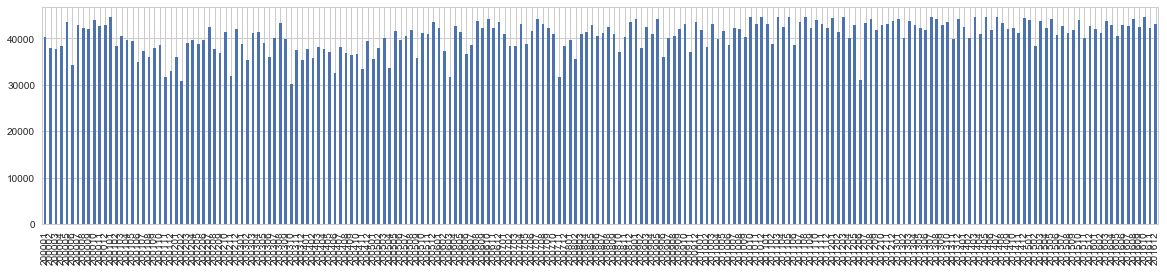

In [15]:
df['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [16]:
incre = 10
max_speed = df['speed'].quantile(.99)
max_count = max_count_for_angles(df, 0, 360, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title='%s (%s - %s), %s' %(angle, start_angle, end_angle, len(sub_df)) )
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANgAAAB6CAYAAADd9J0IAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE71JREFUeJzt3XtUzPn/B/DndMMm4kScJaRiQxeXbLtdjiWxFSKrIrvI
pYN1OSiXChXFZo+1RQlLbrWJ42D3S64bZdUW28WlrGIpE0rTRWnevz/8+qzRTDPFp5nyepzTOebz
eX+m53vGq8/785nPvD8CxhgDIYQXasoOQEhbRgVGCI+owAjhERUYITyiAiOER1RghPDooyiw2tpa
bNy4ESNHjsTIkSOxZcsW1NXVNbqNSCSCi4sLSktLZbYJCAjAgAEDJH42btwos/29e/cwffp0mJub
w8nJCVeuXGl2n+rNmTOnQYY9e/bIbJ+WlgZXV1eYmZlhypQp+Pvvv7l1Z8+exerVq5ud5dSpU5g8
ebLEMrFYjOjoaIwZMwaWlpaYNm0a0tPTFd4eAJKTkzFhwgSYmZlh4sSJuH79Orfu9evX+OGHH2Bj
YwMLCwt4e3vj/v37EtufO3cO48aNg5mZGWbOnImCgoJm97HJ2EcgNDSUOTg4sIyMDHb16lX25Zdf
soiIiEa3CQoKYrt27Wq0jbu7O4uMjGRPnz7lfsrLy6W2raqqYnZ2dszf35/l5eWxiIgINmTIEPbg
wYNm94sxxmxtbdnx48clMlRWVkptW1RUxCwtLdn27dtZXl4eW79+PRs5ciQrKyvj2kyZMoVdv369
yTmSk5OZubk5c3V1lVi+b98+ZmVlxc6dO8f++ecfFhYWxiwsLNijR48U2j43N5cNGjSIRUREsAcP
HrCtW7eyoUOHsuLiYsYYYz/++COzt7dnKSkp7P79+2zZsmXsq6++YrW1tYwxxrKzs9ngwYPZwYMH
2d27d9nixYuZo6Mjt55vbb7Aqqurmbm5OUtKSuKWJSYmMmtra1ZXVyd1m6dPnzILCwtWWlra6HNb
WVmxy5cvK5Tj+PHjzNramtXU1HDLZsyYwUJDQxXaXpry8nJmYmLC8vLyFGq/Y8cONmnSJO6xWCxm
o0ePZrGxsRI5Z8yY0aQcoaGhbNCgQczZ2blBgTg7O7OoqCiJZWPHjmX79u1TaPtly5axBQsWSGR2
dXVl586dY4wxFh4ezs6ePcutz83NZSYmJqywsJAxxpifnx9buHAht76iooJZWFiwCxcuNKmPzdXm
h4i5ubmoqqqClZUVt2z48OF49uwZCgsLpW4TFxcHS0tLdO7cWebzCoVClJaWol+/fgrl+Ouvv2Bp
aQlNTU1u2YgRI5CRkaFgTxrKy8uDhoYGDAwMFGqfkZGBESNGcI8FAgGGDRsmkWHUqFHIyMjAnTt3
FM6RmpqK/fv3Y+zYsQ3W+fv7Y8KECQ2Wl5eXK7R9SkoKxo8fL5E5MTERY8aMAQAsX74cDg4OAICy
sjIcOHAAffv2Rc+ePaX2+ZNPPsGgQYOQmZmpcP/eR5svsOLiYnTo0AE6Ojrcsm7dugEAioqKpG5z
6dIl2NraNvq8eXl5EAgE2L17N+zt7fH1119j7969EIvFUts/ffoU3bt3l1imp6eH4uLipnSnQYaO
HTvCz88PNjY2mDhxIo4fPy6zvSIZOnfujCFDhuDy5csK5zh+/DiGDRsmdZ2VlRV69OjBPb506RIe
PHgAa2truduXl5fj+fPn0NTUxKJFi/DFF1/Aw8ND6h+lmJgYWFlZ4dSpU9iwYQM0NDQAvHn/pfVZ
1nv/obX5AquqqkK7du0klmlpaQEAampqGrSvq6tDTk4OjIyMGn3e+/fvQ01NDQYGBoiOjsbs2bMR
ERGBmJiYJuWQlkFR+fn5qK6uhrW1NWJiYjBp0iT4+/vj9OnT75XByMgIWVlZzc4lS15eHnx9feHs
7Izhw4fLbV9RUQEACA4O5vo4ZMgQfPfdd3j06JFEW0dHRyQmJsLV1RU+Pj7Iz88HAFRXV3/w170p
NFrktyhR+/btG7yY9Y87dOjQoH1paSnq6urQpUsXbpm3t7fEma/Tp0/D09MTTk5O0NXVBQAMGDAA
ZWVl+OWXXzBv3jyFc7Rv315qbicnJzx+/Jh7LO2v9ooVK7BgwQJuKDtw4EA8fPgQsbGxcHJyanYG
XV3dBmfi3ldWVhbmzp0LY2NjhISEKLRN/V7I2dkZ06dPBwCYmpoiNTUVv/76K5YtW8a17d27NwBg
/fr1SE9PR0JCAnx9fWX2Wdp7z4c2X2A9evRAZWUlRCIROnbsCODN8RMA6OvrN2gvEAgAQGKoFxIS
gurqau5x9+7dIRAIuOKqZ2RkhJKSEtTV1UFdXV1inb6+Pvd76wmFQqkZACA6OhqvX79utG/q6uoN
jhP79++PS5cuSW2vaIa6ujqoqX24wc2NGzcwf/58mJubIzIyUuYflXfp6upCU1OzwWjC0NAQjx8/
hlgsxsWLFzF48GCuDwKBAP3798eLFy8AyO7z28dlfGrzQ8SBAweiQ4cOEnugtLQ06OnpST050KVL
F2hoaHBvEPDmTerTpw/3o6GhgZCQEMyaNUti26ysLPTt27dBcQGApaUlMjIyJIomLS0NlpaWUnN/
+umnEr9TmkWLFmHt2rUSy7Kzs2FoaCi1vaWlJdLS0rjHjDHu5MvbXrx4wR2nvq/bt29j3rx5GDFi
BKKiopq059DQ0IC5uTmys7Mllufn56N3795QU1PDxo0bkZiYyK2rq6tDbm4uV5Tv9rmyshI5OTky
X/cPrc0XWPv27eHm5oaNGzciPT0dKSkpCA8Px8yZM6W2FwgEMDU1lXsWbcyYMUhNTUV0dDQKCwtx
4sQJxMTEwMfHB8CbN1ooFHJ7vvozZP7+/sjPz8fOnTtx69YtuLu7N7tvY8aMwYkTJ3Ds2DEUFhZi
//79OHnyJBYsWADgzVBIKBRyQyQ3Nzfk5eVh27ZtyM/PR1BQECoqKuDi4iLxvHfu3MGQIUMAvDmG
EQqFcj+Yl2X16tXo3r07AgICUFZWBqFQCKFQCJFIpND2c+fORUJCAuLi4lBQUIAtW7bg4cOH3AfS
Xl5eiImJQVJSEvLz87Fu3TpUVlZi2rRpAABPT08kJSVh//79uHfvHvz8/NCzZ0/Y2Ng0qz9NJWCs
dXzhUtan/4qoqanB/v37kZqaCk1NTdjZ2cHd3V3mMCgxMRH37t2Dr69vo8/7559/IjExEU+ePEGX
Ll3g4uKC0aNHA3gzDFmyZAnmz58Pe3t7AMCDBw+wd+9eFBQUQF9fHzNmzICZmVmz+wUASUlJ+O23
31BSUgJ9fX1MnTqVG/7k5OQgODgY69atg6mpKYA3e9kDBw6guLgYBgYGmDVrlsQer7KyEvPnz8eW
LVvQs2dPXL58GVFRUdi+fbvcvVpCQgIyMjK4Y6yioiIsX75calsnJyfuuErW9vWuXbuGY8eOoaSk
BL1798aMGTMwcOBAAG+G8qdOncL58+dRWloKExMTfPvtt+jVq5fE9vHx8SgtLYWxsTG8vb1lDs3f
h9QzqS3yadsHkJaW1mK/q6ioiJmbmzOhUNjs52jJvB9Cfd6jR4+ymTNnSqybO3fue70WfFC111dW
njY/RGwOfX19uLq6Ii4uTtlRWhRjDEeOHOGGucCbD8jV1NSgp6enxGStFxWYDMuXL8eZM2cavdi3
rfn9999hYmKCzz//nFtmZmaGnTt3KjFV69bmT9M3l46OjswPbNuq8ePHS1yWBPz3WRRpHtqDEcIj
KjBCeEQFRgiPFBpgR0VF4cKFC6itrYWHhwesrKzg5+cHgUAAY2NjBAYGQk1NDfHx8Th69Cg0NDTg
4+ODUaNGobq6GitXrsSzZ8+gra2NsLAwdO3aFZmZmQgJCYG6ujpsbGywaNEivvtKSIuTuwe7fv06
MjIycOTIEcT

In [17]:
# Create Output csv

df['HrMn'] = df['time'].apply(lambda x: x[11:15])
df['date'] = df['time'].apply(lambda x: x[3:11])
df['time'] = df['date'].apply(lambda x: x[3:])

# df=df[['stationID','date','HrMn', 'vis','day_type','dir','speed','dir_max','speed_max']]
df=df[['stationID','date','HrMn', 'dir','speed','speed_max']]

In [18]:
# df.to_csv(save_file_dir + '/minute_avg.csv', index=False, float_format='%.2f')

## US 1 min to Hour avg

In [19]:
print(file_dir, convert_type)

BWI hr_avg


In [20]:
## Output format: date, HrMn, dir, speed, speed_max

if 'df' not in globals():
    df = pd.read_csv(save_file_dir + '/minute_avg.csv', header=0, skipinitialspace=True, dtype={'HrMn': object})

df['date']=pd.to_numeric(df['date'], errors='coerce')
df['speed']=pd.to_numeric(df['speed'], errors='coerce')
df['dir']=pd.to_numeric(df['dir'], errors='coerce')
df = df.dropna()
df=df[['date','HrMn','dir','speed']]
df

,date,HrMn,dir,speed
0,20000101,0000,196,0
1,20000101,0001,194,0
2,20000101,0002,192,0
3,20000101,0003,178,0
4,20000101,0004,165,1
5,20000101,0005,161,0
6,20000101,0006,146,0
7,20000101,0007,128,0
8,20000101,0008,120,0
9,20000101,0009,120,0


In [21]:
df.describe()

,date,dir,speed
count,8.277063e+06,8.277063e+06,8.277063e+06
mean,2.008259e+07,2.077199e+02,5.856124e+00
std,4.901189e+04,9.547995e+01,4.160336e+00
min,2.000010e+07,0.000000e+00,0.000000e+00
25%,2.004063e+07,1.330000e+02,3.000000e+00
50%,2.008103e+07,2.320000e+02,5.000000e+00
75%,2.012122e+07,2.850000e+02,8.000000e+00
max,2.016123e+07,3.590000e+02,1.000000e+02


In [22]:
df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

In [23]:
if convert_type != '10min_avg':
    # 1. Hourly avg
    ## This would make all 0 speed in to 0 speed, 0 dir, need more elaborate
    temp_df = df.groupby(['date', 'Hr']).agg({'x' : np.mean,'y': np.mean}).reset_index()
    temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)
else:
    # 2. 10 min average
    df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
    temp_df = df.resample(rule='10Min', on='time').mean()
    temp_df['HrMn']=temp_df.index.strftime('%H%M')
    temp_df['date']=temp_df.index.strftime('%Y%m%d').astype(int)
    temp_df = temp_df.reset_index().drop(['time'], 1)

# Regain speed, dir
temp_df['speed']=np.sqrt(temp_df.x**2 + temp_df.y**2)
temp_df['dir']=np.degrees(np.arctan2(temp_df.y, temp_df.x))%360
temp_df.drop(['Hr', 'x','y'], 1, inplace=True)

In [24]:
temp_df.describe()

,date,speed,dir
count,1.406510e+05,140651.000000,140651.000000
mean,2.008188e+07,5.643921,208.349151
std,4.907254e+04,3.954837,95.481465
min,2.000010e+07,0.000000,0.000000
25%,2.004052e+07,2.611462,133.870412
50%,2.008092e+07,4.875233,234.784891
75%,2.012112e+07,7.766716,284.931548
max,2.016123e+07,31.906861,359.981915


### Time Comparison

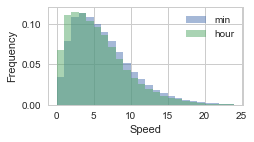

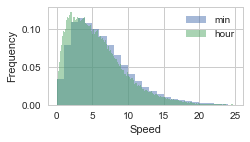

In [25]:
max_speed = df['speed'].quantile(0.999)
bins=arange(0,max_speed)
figsize=(3.5,1.8)

df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=figsize)

plt.figure()
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=arange(0,max_speed, 0.1), normed=True,alpha=0.5,label='hour')
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=figsize)

In [26]:
sss

NameError: name 'sss' is not defined

In [ ]:
# df[(df['time'] > '2016-12-06 00:00:00') & (df['time'] < '2016-12-06 17:00:00')]

In [ ]:
temp_df.query('speed == 1')

In [ ]:
# Check for existance of 0 speed/dir after avg
for df_ in [df, temp_df]:
    plt.figure()
    df_.query('speed == 0')['date'].apply(lambda x: str(x)[0:6]).value_counts().sort_index().plot(kind='bar', figsize=(20,4))

In [ ]:
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

In [ ]:
temp_df.ix[(temp_df['dir'] == 0) & (temp_df['speed']==0), 'dir'] =np.nan
temp_df['dir'].interpolate(inplace=True)

bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

In [ ]:
bins=arange(0,370,5)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True, figsize=(20,4))

### Resample Comparison

In [ ]:
bins=arange(0,362)
for sample_size in [50000, 300000]:
    plt.figure()
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    df.sample(n=sample_size, replace=True)['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min_resampled')
    plt_configure(legend=True, figsize=(20,4))

### Direction Comparison

In [ ]:
incre = 10
max_speed = temp_df.speed.max()

for angle in arange(0, 360, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, _ = select_df_by_angle(df, start_angle, end_angle)
    sub_df_hourly, _ = select_df_by_angle(temp_df, start_angle, end_angle)   

    fig = plt.figure()
    bins = arange(0, max_speed)
    sub_df['speed'].hist(bins=bins, alpha=0.5, label='min', normed=True)
    sub_df_hourly['speed'].hist(bins=bins, alpha=0.5, label='hour', normed=True)
    plt.gca().set_xlim([0, max_speed])
    plt_configure(figsize=(3,1.5), legend=True, title='%s (%s - %s), %s/%s' %(angle, start_angle, end_angle, len(sub_df),len(sub_df_hourly)))
align_figures()

In [ ]:
check_time_shift(df)
check_time_shift(temp_df)

In [ ]:
import time
current_file = 'file_format.ipynb'
output_file = 'D:/output_HTML/{}_stats_{}.html'.format(file_dir, convert_type) 
save_notebook()
output_HTML(current_file, output_file)

In [ ]:
temp_df.to_csv('{}/{}.csv'.format(save_file_dir, convert_type), index=False, float_format='%.2f')

In [ ]:
sss



# Portus

In [ ]:
speed_input_file = 'D:/data/speed.json'
dir_input_file = 'D:/data/direction.json'

import json
from pprint import pprint

with open(speed_input_file) as data_file:    
    speed_data = json.load(data_file)

with open(dir_input_file) as data_file:    
    dir_data = json.load(data_file)
# pprint(data)

In [ ]:
speed_df = pd.DataFrame(speed_data["data"][0][0], columns=['timestamp', 'speed'])
dir_df = pd.DataFrame(dir_data["data"][0][0], columns=['timestamp', 'dir'])

In [ ]:
df = pd.merge(speed_df, dir_df, on='timestamp')
df

In [ ]:
df['hr']=df['timestamp']/1000/3600
df['time']=pd.to_datetime('2006-01-01T00:00:00Z')+pd.to_timedelta(df['hr']-315568, unit='h')

In [ ]:
df

In [ ]:
df.sort_values(by='speed')

In [ ]:
df[df.duplicated(subset=['timestamp'])]

In [ ]:
df.drop_duplicates(subset='time', inplace=True)

In [ ]:
df

In [ ]:
save_file = 'D:/data/dat.csv'
df[['time','speed','dir']].to_csv(save_file, index=False)

# US NDBC

## Formatting Files

In [ ]:
from io import StringIO

station_id = '44013'
# '46086', '42057', '46014', 'cdrf1', '46081', '44013'

file_path = 'D:/NDBC/{}'.format(station_id)
fout=StringIO()
fout.write('YY MM DD hh mm dir speed GDR GST GTIME\n')
for time in arange(2000, 2017):
    try:
        file_name = "{}/{}.txt".format(file_path, time)
        for line in open(file_name):
            if 'MM DD' in line or 'mo dy' in line:
                pass
            else:
                fout.write(line)    
    except: 
        print('No data available at {}'.format(time))
        pass
all_data_file = fout.getvalue()
fout.close()

In [ ]:
df = pd.read_csv(StringIO(all_data_file), skipinitialspace=True, error_bad_lines=False, sep=' ', 
                 dtype={'YY': object, 'MM': object, 'DD': object, 'hh': object, 'mm': object})
df

In [ ]:
df['date']=df['YY']+df['MM']+df['DD']
df['HrMn']=df['hh']+df['mm']
save_file = "{}/10_min.csv".format(file_path)
df[['date','HrMn','dir','speed']].to_csv(save_file, index=False, float_format='%.2f')

In [ ]:
sss

## Download Files

In [ ]:
import os
import urllib.request 

for station_id in [ '44013']:
#     '46086', '42057', '46014', 'cdrf1', '46081',
    print("http://www.ndbc.noaa.gov/station_history.php?station={}".format(station_id))
    file_path = 'D:/NDBC/{}'.format(station_id)
    if not os.path.exists(file_path):
        os.makedirs(file_path)
    for time in arange(1990, 2017):
        try:
            url = "http://www.ndbc.noaa.gov/view_text_file.php?filename={}c{}.txt.gz&dir=data/historical/cwind/".format(station_id,time)
            file_name = "{}/{}.txt".format(file_path, time)
            urllib.request.urlretrieve(url, file_name)
        except: 
            print('No data available at {}'.format(time))
            pass

In [ ]:
sss

# ECMWF Dataset

In [ ]:
file_path='D:/data/10_metre_U_wind_component_surface.txt'
save_file = 'D:/data/10_U.csv'
df = pd.read_csv(file_path, sep='\t')

In [ ]:
# query_string = 'lat > 47.1 & lat < 48 & lon > 257.1 & lon < 258' 
# query_string = 'lat > 48.1 & lat < 49 & lon > 261.1 & lon < 262' 
# query_string = 'lat >= 48 & lat < 49 & lon > 256.1 & lon <= 257' 
query_string = 'lat >= 28 & lat < 29 & lon > 343 & lon <= 344' 
# query_string = 'lat >= 20 & lat < 21 & lon >=120& lon < 121' 

u_df = df.query(query_string)
u_df

In [ ]:
# temp_df.to_csv(save_file, index=False)

In [ ]:
file_path='D:/data/10_metre_V_wind_component_surface.txt'
save_file = 'D:/data/10_V.csv'
mege_file = 'D:/data/dat.csv'
df = pd.read_csv(file_path, sep='\t')
v_df = df.query(query_string)
# temp_df.to_csv(save_file, index=False)

In [ ]:
df = pd.merge(u_df, v_df, on='time')[['time', 'lat_x', 'lon_x', '10_metre_U_wind_component_surface', '10_metre_V_wind_component_surface']]
df.rename(columns={'10_metre_U_wind_component_surface': 'U', '10_metre_V_wind_component_surface': 'V',
                  'lat_x': 'lat', 'lon_x': 'lat'}, inplace=True)
df

In [ ]:
df.to_csv(mege_file, index=False)

In [ ]:
sss

In [ ]:
# file_path='47N123W.csv'
# file_path='8N293E.csv'
# file_path='./data/ECMWF/chile/52S75W/dat.csv'
# file_path='65N17W.csv'
# file_path='./data/ECMWF/sudan/18N32E/dat.csv'
file_path='./data/ecmwf/china/24N121E/dat.csv'
# file_path='37S142E.csv'

df = pd.read_csv(file_path, header=0, skipinitialspace=True)
df.rename(columns={'U':'x','V':'y'}, inplace=True)
df['speed']=np.sqrt(df.x**2+df.y**2)
df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
df['date']=df['time'].dt.strftime('%Y%m%d')
df['HrMn']=df['time'].dt.strftime('%H00')
df.set_index(['time'], inplace=True)

df

In [ ]:
sub_df =df['2011':'2015']
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

plt.figure()
bins=arange(0,361)
df['dir'].hist(bins=bins)

In [ ]:
np.degrees(np.arctan2(-3, 5))%360

In [ ]:
df.x = -df.x
df.y = -df.y
df['dir']=np.degrees(np.arctan2(df.y, df.x))%360

In [ ]:
sub_df =df['2011':'2015']
df.head()

In [ ]:
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

In [ ]:
bins=arange(0,df.speed.max(),0.5)
df['speed'].hist(bins=bins)

plt.figure()
bins=arange(0,361)
df['dir'].hist(bins=bins)

In [ ]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

In [ ]:
sub_df =df['2011':'2015']
plot(sub_df.x, sub_df.y, '.', alpha=0.5)

In [ ]:
sss

# 2. NDAWN Dataset

In [ ]:
# file_dir = 'D:/NDAWN/fargo/'
# file_dir = 'D:/NDAWN/grand_forks/'
# file_dir = 'D:/NDAWN/williston/'
# file_dir = 'D:/NDAWN/jamestown/'
# file_dir = 'D:/NDAWN/minot/'
file_dir = './data/NDAWN/dickinson/'

file_path = file_dir+'table.csv'
save_file_path  = file_dir+'hr_avg.csv'
df = pd.read_csv(file_path, skipinitialspace=True, dtype={'Year':'object', 'Month':'object', 
                                                          'Day':'object'})
df

In [ ]:
df.describe()

In [ ]:
## Output format: date, HrMn, dir, speed, speed_max
df['HrMn']=df['Hour'].apply(lambda x: "%04d"%x ) 
df['date']=df['Year']+df['Month']+df['Day']
df = df[['date','HrMn','Avg Wind Speed', 'Max Wind Speed', 'Avg Wind Dir', 'Avg Wind Dir SD']]
df.rename(columns={'Avg Wind Speed': 'speed', 'Max Wind Speed': 'speed_max', 
                   'Avg Wind Dir': 'dir', 'Avg Wind Dir SD': 'dir_std'}, inplace=True)

In [ ]:
df

In [ ]:
## too slow, need optimization
import datetime as dt

def my_to_datetime(date_str):
    if date_str[8:10] != '24':
        return pd.to_datetime(date_str, format='%Y%m%d%H%M')

    date_str = date_str[0:8] + '00' + date_str[10:]
    return pd.to_datetime(date_str, format='%Y%m%d%H%M') + \
           dt.timedelta(days=1)
   
df['time']=df["date"].astype(str).map(str)+df["HrMn"]
df['time']=df['time'].apply(my_to_datetime)
df['date']=df['time'].apply(lambda x: x.strftime('%Y%m%d'))
df['HrMn']=df['time'].apply(lambda x: x.strftime('%H%M'))

In [ ]:
df.speed.value_counts().sort_index()

In [ ]:
bins=arange(0,df['speed'].max())
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True)

plt.figure()
bins=arange(0,362)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
plt_configure(legend=True, figsize=(20,4))

In [ ]:
df.to_csv(save_file_path, index=False, float_format='%.2f')

In [ ]:
sss

# 3. Read from Chinese Data sets

In [ ]:
import csv

ipath= "./data/NCDC/cn/上海/上海/dat.txt"
uipath = unicode(ipath , "utf8")

with open(uipath) as fin, open('./data/NCDC/test.txt', 'w') as fout:
    o=csv.writer(fout)
    for line in fin:
        o.writerow(line.split())